# Histogram

```warning
The hist package is still under active development, the usage and contents are in flux.
```

In [1]:
import hist
import matplotlib.pyplot as plt

In [2]:
# Fill the axes
h = hist.Hist(
    hist.axis.Regular(
        50, -5, 5, name="S", label="s [units]", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        50, -5, 5, name="W", label="w [units]", underflow=False, overflow=False
    ),
)

In [3]:
# Same thing with shortcut
h = hist.Hist.Reg(
    50, -5, 5, name="S", label="s [units]", underflow=False, overflow=False
).Reg(50, -5, 5, name="W", label="w [units]", underflow=False, overflow=False)

Note that you cannot add axes after you have initialized the Hist.

In [4]:
import numpy as np

s_data = np.random.normal(size=50_000)
w_data = np.random.normal(size=50_000)

# fill by names
h.fill(W=w_data, S=s_data)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='S', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='W', label='w [units]'),
  storage=Double()) # Sum: 50000.0

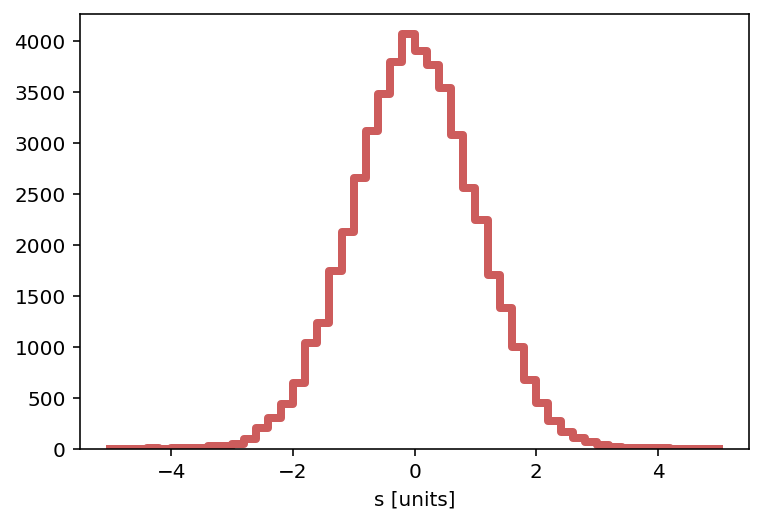

In [5]:
h.project("S").plot1d(ls="-", c="indianred", lw=4)
plt.show()

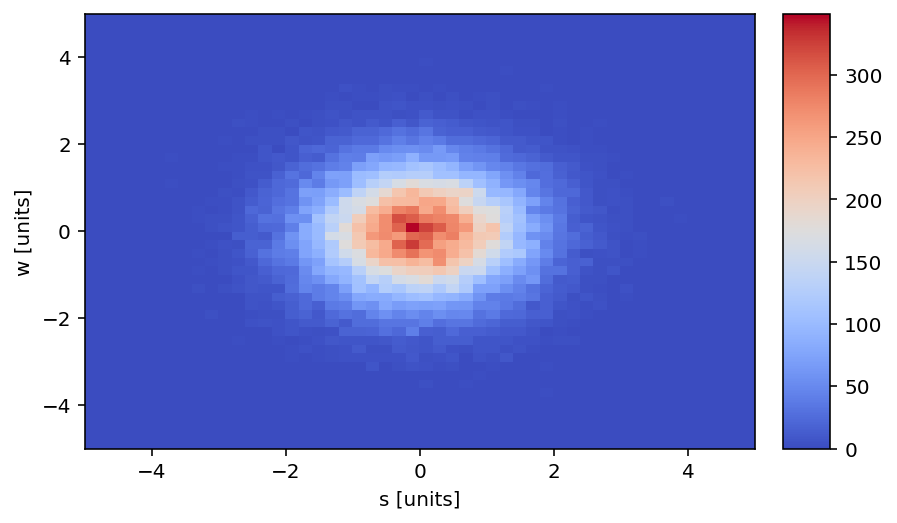

In [6]:
h.plot2d(cmap="coolwarm")
plt.show()

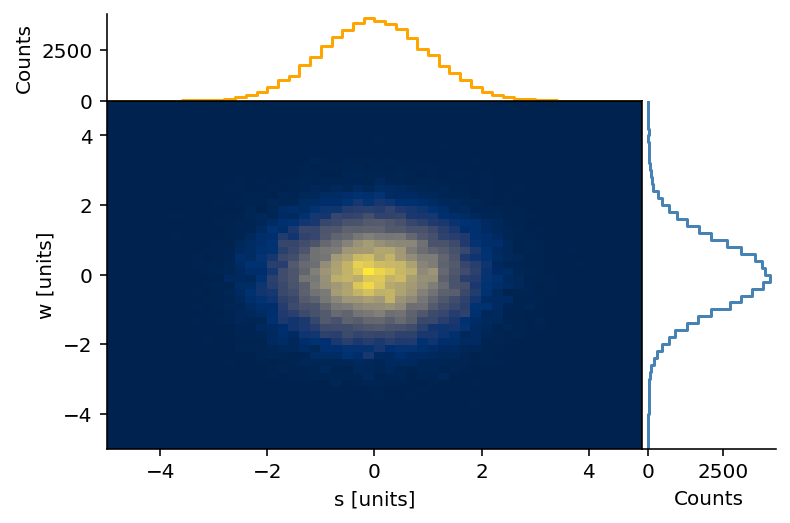

In [7]:
# plot2d_full
h.plot2d_full(
    main_cmap="cividis", top_color="orange", side_color="steelblue",
)
plt.show()

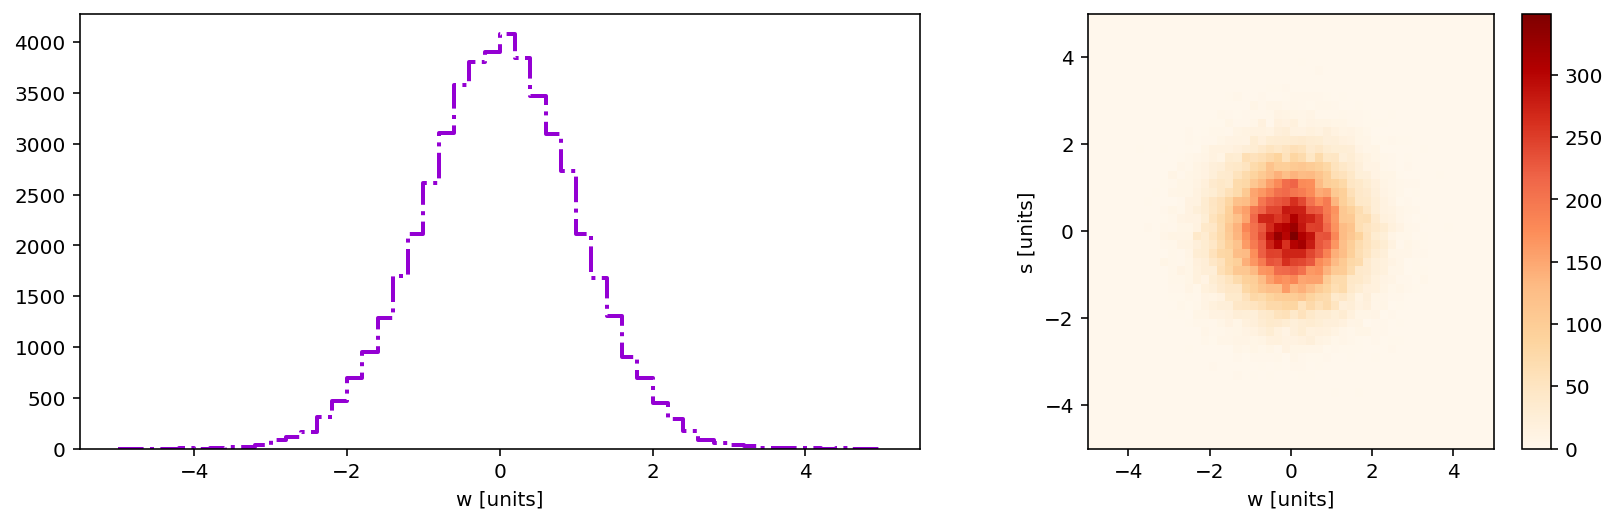

In [8]:
# auto-plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

h.project("W").plot(ax=axs[0], c="darkviolet", lw=2, ls="-.")
h.project("W", "S").plot(ax=axs[1], cmap="OrRd")
plt.show()

#### Via Plot Pull

Pull plot is commonly used in HEP studies, we provide a method for this specific type of plot called `.plot_pull()`, where you can pass in a Callable object and then we could fit it on the plot.

In [9]:
from uncertainties import unumpy as unp


def pdf(x, a=1 / np.sqrt(2 * np.pi), x0=0, sigma=1, offset=0):
    exp = unp.exp if a.dtype == np.dtype("O") else np.exp
    return a * exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + offset

*(The uncertainty is non-significant as we filled a great quantities of observation points above.)*

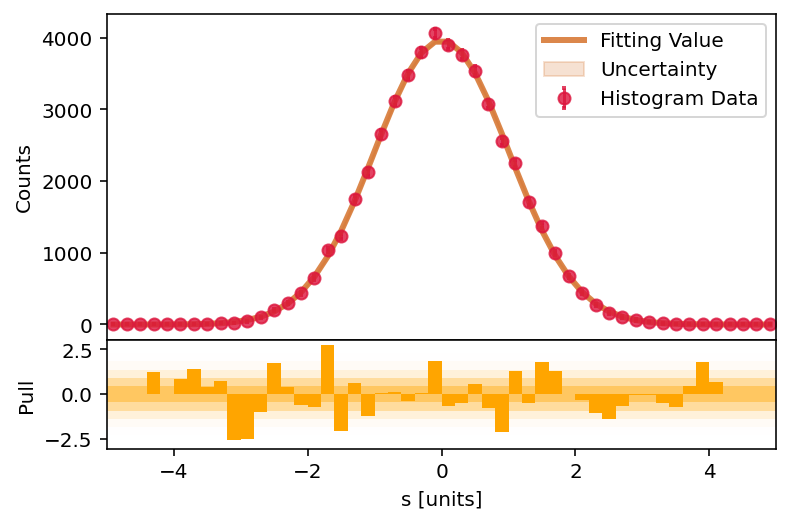

In [10]:
h.project("S").plot_pull(
    pdf,
    eb_ecolor="crimson",
    eb_mfc="crimson",
    eb_mec="crimson",
    eb_fmt="o",
    eb_ms=6,
    eb_capsize=1,
    eb_capthick=2,
    eb_alpha=0.8,
    fp_c="chocolate",
    fp_ls="-",
    fp_lw=3,
    fp_alpha=0.8,
    bar_fc="orange",
    pp_num=6,
    pp_fc="orange",
    pp_alpha=0.618,
    pp_ec=None,
    ub_alpha=0.2,
)

plt.show()

#### Via Mplhep

[mplhep](https://github.com/scikit-hep/mplhep) is an important visualization tools in Scikit-Hep ecosystem. hist has integrate with mplhep and you can also plot using it. If you want more info about mplhep please visit the official repo to see it.

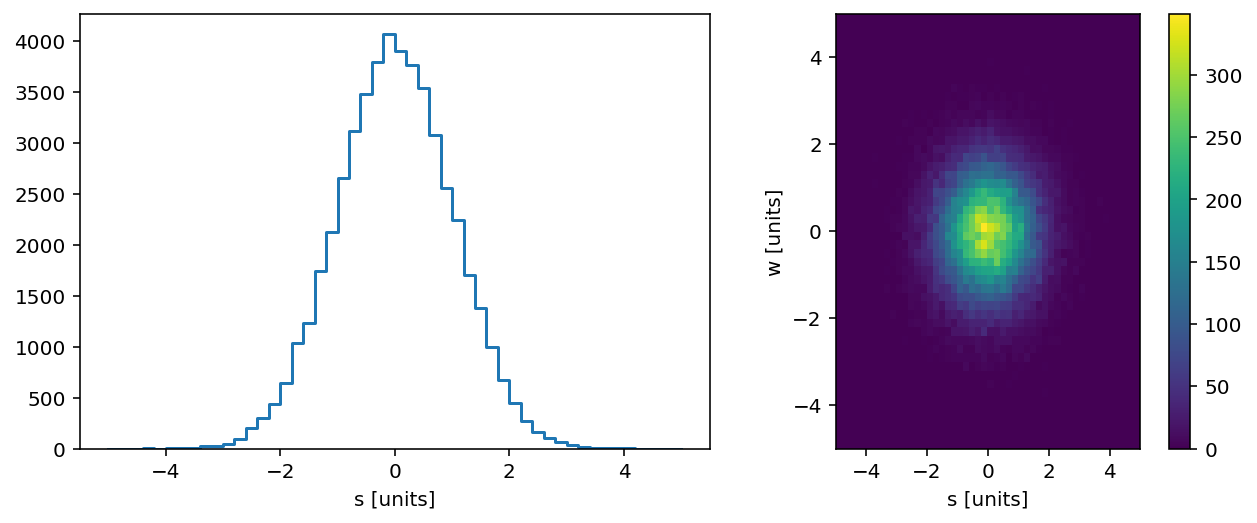

In [11]:
import mplhep

plt.subplot(121)
mplhep.histplot(h.project("S"))

plt.subplot(122)
mplhep.hist2dplot(h)

plt.show()